In [1]:
%matplotlib inline

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import time
import matplotlib.pyplot as plt
# Google API Key
from config import gkey

In [3]:
# Retrieve parameters for query
commute_parameters_df = pd.read_csv("commute_parameters.csv")

# Fill in parameters for this notebook
times_to_work = commute_parameters_df['times_list_to_work'][0]
times_list_to_work = times_to_work.strip('][').split(', ') 
#print(times_list_to_work)

times_to_home = commute_parameters_df['times_list_to_home'][0]
times_list_to_home = times_to_home.strip('][').split(', ')
#print(times_list_to_home)

home_location = commute_parameters_df['home_location'][0]
work_location = commute_parameters_df['work_location'][0]

In [4]:
commute_dates_df = pd.read_csv("commute_dates.csv")
dates_list = commute_dates_df['Date'].tolist()

In [5]:
# Retrieve commute data from .csv files 
commute_to_work_df = pd.read_csv("commute_to_work.csv")
commute_to_work_df['Commute Time'] = commute_to_work_df['Commute Time'].astype(int) 
commute_to_home_df = pd.read_csv("commute_to_home.csv")
commute_to_home_df['Commute Time'] = commute_to_home_df['Commute Time'].astype(int) 

81


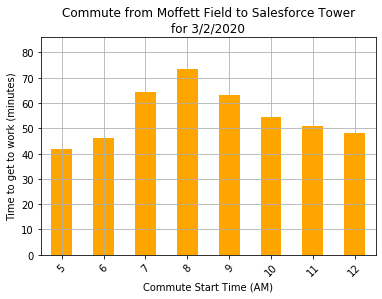

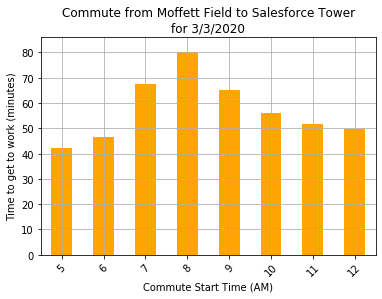

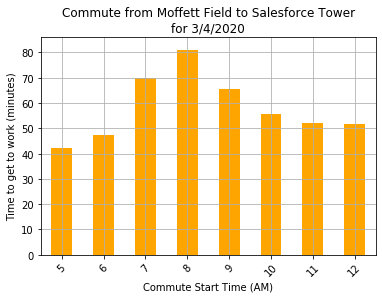

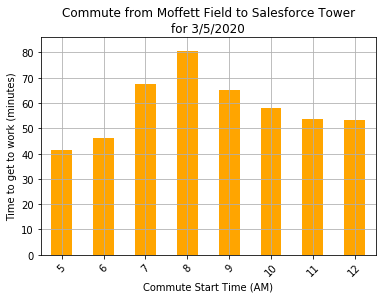

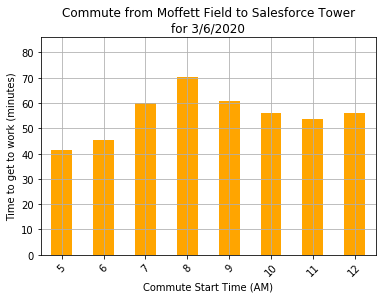

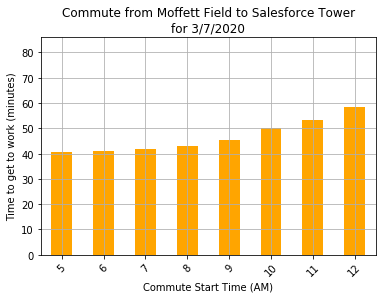

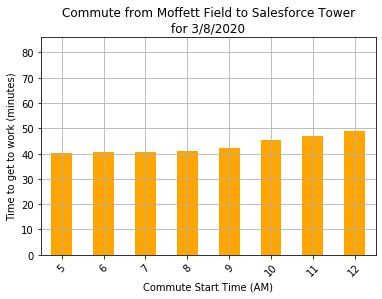

In [6]:
# Going to work...
# Create 7 bar charts, one for each day of week, with start times we have stored as x-axis 
# and commute time in minutes as y-axis
s_times_list_to_work = [str(item) for item in times_list_to_work]    
y_Max = round(commute_to_work_df['Commute Time'].max()/60)
print(y_Max)
for day in dates_list:
    commute_to_plot_df = commute_to_work_df[commute_to_work_df['Commute Date'] == day]
    work_trips = commute_to_plot_df['Commute Time']/60
    work_times = work_trips.plot(kind="bar", title= f"Commute from {home_location} to {work_location}\nfor {day}", color="orange",rot=45)
    work_times.set_xlabel("Commute Start Time (AM)")
    work_times.set_ylabel("Time to get to work (minutes)")
    work_times.set_xticklabels(s_times_list_to_work)
    work_times.set_ylim(0, y_Max+5)
    work_times.grid(b=True)
    plt.show()

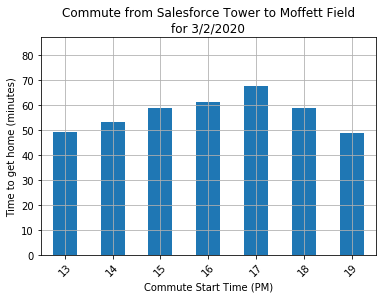

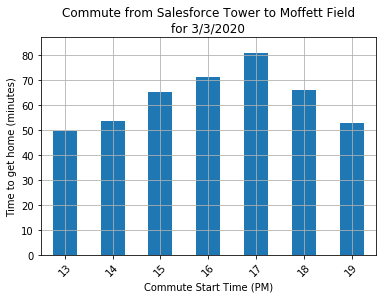

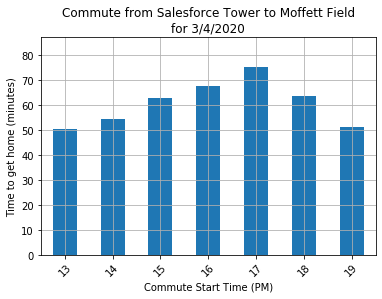

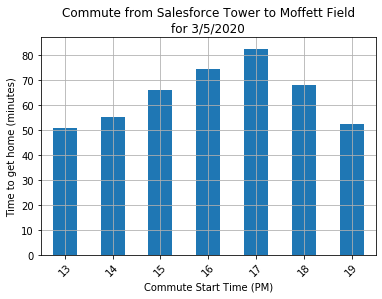

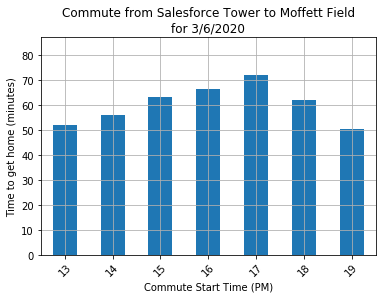

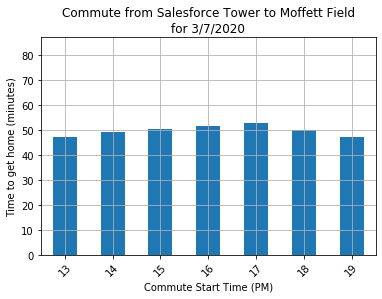

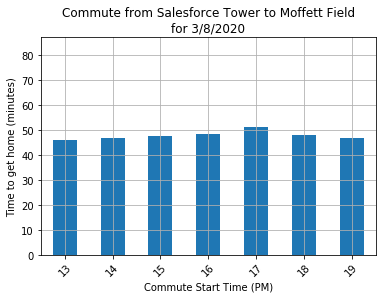

In [7]:
# Going Home...
# Create 7 bar charts, one for each day of week, with start times we have stored as x-axis 
# and commute time in minutes as y-axis
s_times_list_to_home = [str(item) for item in times_list_to_home]
y_Max = round(commute_to_home_df['Commute Time'].max()/60)
#print(y_Max)
for day in dates_list:
    commute_to_plot_df = commute_to_home_df[commute_to_home_df['Commute Date'] == day]
    work_trips = commute_to_plot_df['Commute Time']/60
    work_times = work_trips.plot(kind="bar", title= f"Commute from {work_location} to {home_location}\nfor {day}",rot=45)
    work_times.set_xlabel("Commute Start Time (PM)")
    work_times.set_ylabel("Time to get home (minutes)")
    work_times.set_xticklabels(s_times_list_to_home)
    work_times.set_ylim(0, y_Max+5)
    work_times.grid(b=True)
    plt.show()
